In [6]:
## 1. Load data which is interpolated DENSITIES not just lengths
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

epidermis_densityXcoord = pd.read_csv('../data/230608-epidermis-density-x-coordinates.csv')
epidermis_densityYcoord = pd.read_csv('../data/230608-epidermis-density-y-coordinates.csv')

dermis_densityXcoord = pd.read_csv('../data/230608-dermis-density-x-coordinates.csv')
dermis_densityYcoord = pd.read_csv('../data/230608-dermis-density-y-coordinates.csv')

In [7]:
## 1a. glimpse data
print(dermis_densityYcoord.head(5))

   Unnamed: 0  Animal_A.tifdiff_vec2.txt  Animal_B.tiffdiff_vec2.txt  \
0           1                   0.000020                    0.000030   
1           2                   0.000023                    0.000035   
2           3                   0.000027                    0.000040   
3           4                   0.000032                    0.000047   
4           5                   0.000037                    0.000054   

   Animal_C.tifdiff_vec2.txt  Animal_D.tifdiff_vec2.txt  \
0                   0.000013                   0.000006   
1                   0.000016                   0.000007   
2                   0.000019                   0.000008   
3                   0.000022                   0.000010   
4                   0.000025                   0.000012   

   Animal_E.tifdiff_vec2.txt  Animal_F.tifdiff_vec2.txt  \
0                   0.000004                   0.000010   
1                   0.000006                   0.000013   
2                   0.000008       

In [8]:
## 1a. drop the first columns of each dataframe
epidermis_densityXcoord.drop('Unnamed: 0', axis=1, inplace=True)
epidermis_densityYcoord.drop('Unnamed: 0', axis=1, inplace=True)

dermis_densityXcoord.drop('Unnamed: 0', axis=1, inplace=True)
dermis_densityYcoord.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
dermis_densityYcoord.head(5)

,Animal_A.tifdiff_vec2.txt,Animal_B.tiffdiff_vec2.txt,Animal_C.tifdiff_vec2.txt,Animal_D.tifdiff_vec2.txt,Animal_E.tifdiff_vec2.txt,Animal_F.tifdiff_vec2.txt,Animal_G.tifdiff_vec2.txt,Animal_H.tifdiff_vec2.txt,Animal_I.tifdiff_vec2.txt,Animal_J.tifdiff_vec2.txt,...,Animal_X.tifdiff_vec2.txt,Animal_Y.tifdiff_vec2.txt,Animal_Z.tifdiff_vec2.txt,Animal_Z1.tifdiff_vec2.txt,Animal_Z10.tiffdiff_vec2.txt,Animal_Z2.tifdiff_vec2.txt,Animal_Z4.tifdiff_vec2.txt,Animal_Z6.tiffdiff_vec2.txt,Animal_Z8.tiffdiff_vec2.txt,Animal_Z9.tiffdiff_vec2.txt
0,0.000020,0.000030,0.000013,0.000006,0.000004,0.000010,0.000047,0.000026,0.000025,0.000022,...,0.000008,0.000046,0.000015,0.000023,0.000009,0.000016,0.000005,0.000010,0.000038,0.000015
1,0.000023,0.000035,0.000016,0.000007,0.000006,0.000013,0.000056,0.000031,0.000029,0.000027,...,0.000009,0.000053,0.000018,0.000029,0.000011,0.000020,0.000006,0.000012,0.000055,0.000021
2,0.000027,0.000040,0.000019,0.000008,0.000008,0.000016,0.000067,0.000037,0.000033,0.000033,...,0.000011,0.000061,0.000022,0.000035,0.000013,0.000024,0.000007,0.000015,0.000078,0.000028
3,0.000032,0.000047,0.000022,0.000010,0.000010,0.000020,0.000080,0.000044,0.000039,0.000040,...,0.000013,0.000071,0.000027,0.000042,0.000016,0.000029,0.000008,0.000019,0.000108,0.000037
4,0.000037,0.000054,0.000025,0.000012,0.000013,0.000026,0.000094,0.000053,0.000045,0.000049,...,0.000015,0.000082,0.000033,0.000051,0.000019,0.000035,0.000010,0.000023,0.000149,0.000048


In [12]:
### 2. Write for loop to cycle through Y COORDINATE columns and return indices of peaks 
# for epidermis
df = epidermis_densityYcoord

# make empty list to store peak indices
epidermis_peak_indices = []

for index in range(len(df.columns.values)):
    # get the data in a given volumn index
    this_column_name = df.columns.values[index]
    this_column_data = df[this_column_name]
    
    # call peak function and store result; use '_' to remove empty dictionary from returned array
    result,_ = find_peaks(this_column_data)
    epidermis_peak_indices.append(result)
    
#for dermis 
df = dermis_densityYcoord

# make empty list to store peak indices
dermis_peak_indices = []

for index in range(len(df.columns.values)):
    # get the data in a given volumn index
    this_column_name = df.columns.values[index]
    this_column_data = df[this_column_name]
    
    # call peak function and store result
    result, _ = find_peaks(this_column_data)
    dermis_peak_indices.append(result)

In [13]:
print(dermis_peak_indices[0:4])

[array([110, 296, 425]), array([105, 184, 274, 407]), array([153, 234, 379]), array([ 72, 242, 329, 433])]


In [14]:
print(epidermis_peak_indices[0:4])


[array([122, 166, 308, 432]), array([ 93, 130, 227, 276, 329, 368, 387, 425, 468]), array([118, 249, 340, 378, 453]), array([148, 240, 460])]


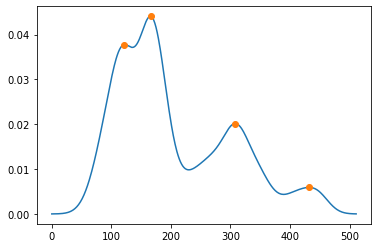

In [27]:
## 3. plot example of peaks for epidermis, animal A
Animal_A_epidermis_lengths = epidermis_densityYcoord[epidermis_densityYcoord.columns.values[0]]
Animal_A_epidermis_peak_indices = epidermis_peak_indices[0]

plt.plot(Animal_A_epidermis_lengths)
plt.plot(Animal_A_epidermis_peak_indices, Animal_A_epidermis_lengths[Animal_A_epidermis_peak_indices], "o")
#plt.xlabel("Micron Value")
#plt.ylabel("Frequency")
#plt.show()

#plt.savefig("../visualizations/peak-analysis/epiderm/Animal_A-micron-length-density-plo-with-peakID.jpeg")
plt.savefig("../visualizations/peak-analysis/epiderm/Animal_A-micron-length-density-plo-with-peakID.png")

# Note: generates same SHAPE


In [54]:
print(dermis_densityYcoord.columns.values)


['Animal_A.tifdiff_vec2.txt' 'Animal_B.tiffdiff_vec2.txt'
 'Animal_C.tifdiff_vec2.txt' 'Animal_D.tifdiff_vec2.txt'
 'Animal_E.tifdiff_vec2.txt' 'Animal_F.tifdiff_vec2.txt'
 'Animal_G.tifdiff_vec2.txt' 'Animal_H.tifdiff_vec2.txt'
 'Animal_I.tifdiff_vec2.txt' 'Animal_J.tifdiff_vec2.txt'
 'Animal_K.tifdiff_vec2.txt' 'Animal_L.tifdiff_vec2.txt'
 'Animal_M.tifdiff_vec2.txt' 'Animal_N.tifdiff_vec2.txt'
 'Animal_O.tifdiff_vec2.txt' 'Animal_P.tiffdiff_vec2.txt'
 'Animal_R.tiffdiff_vec2.txt' 'Animal_U.tifdiff_vec2.txt'
 'Animal_V.tifdiff_vec2.txt' 'Animal_W.tifdiff_vec2.txt'
 'Animal_X.tifdiff_vec2.txt' 'Animal_Y.tifdiff_vec2.txt'
 'Animal_Z.tifdiff_vec2.txt' 'Animal_Z1.tifdiff_vec2.txt'
 'Animal_Z10.tiffdiff_vec2.txt' 'Animal_Z2.tifdiff_vec2.txt'
 'Animal_Z4.tifdiff_vec2.txt' 'Animal_Z6.tiffdiff_vec2.txt'
 'Animal_Z8.tiffdiff_vec2.txt' 'Animal_Z9.tiffdiff_vec2.txt']


In [56]:
## 3a. Generate plots for all dermis and epidermis
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','R','U','V','W','X','Y','Z','Z1','Z10','Z2','Z4','Z6','Z8','Z9']
#df = epidermis_densityYcoord
#df_peak_indices = epidermis_peak_indices
#skin_type = "epiderm"

df = dermis_densityYcoord
df_peak_indices = dermis_peak_indices
skin_type = "derm"

for index in range(len(df.columns.values)):
    this_letter = letters[index]
    
    this_animal_lengths = df[df.columns.values[index]]
    this_animal_peak_indices = df_peak_indices[index]
    
    plt.plot(this_animal_lengths)
    plt.plot(this_animal_peak_indices, this_animal_lengths[this_animal_peak_indices], "o")
    plt.xlabel("Index")
    plt.ylabel("Density")
    
    plt.savefig("../visualizations/peak-analysis/"+skin_type+"/Animal_"+this_letter+"-micron-length-density-plo-with-peakID.png")
    plt.close()



In [38]:
## 4a. now convert arrays to dataframes that can be exported
epidermis_peak_indicesDF = (pd.DataFrame(epidermis_peak_indices)).transpose()
epidermis_peak_indicesDF.columns = epidermis_densityYcoord.columns.values

dermis_peak_indicesDF = (pd.DataFrame(dermis_peak_indices)).transpose()
dermis_peak_indicesDF.columns = dermis_densityYcoord.columns.values

In [37]:
epidermis_peak_indicesDF.head(5)

,Animal_A.tifdiff_vec.txt,Animal_B.tiffdiff_vec.txt,Animal_C.tifdiff_vec.txt,Animal_D.tifdiff_vec.txt,Animal_E.tifdiff_vec.txt,Animal_F.tifdiff_vec.txt,Animal_G.tifdiff_vec.txt,Animal_H.tifdiff_vec.txt,Animal_I.tifdiff_vec.txt,Animal_J.tifdiff_vec.txt,...,Animal_X.tifdiff_vec.txt,Animal_Y.tifdiff_vec.txt,Animal_Z.tifdiff_vec.txt,Animal_Z1.tifdiff_vec.txt,Animal_Z10.tiffdiff_vec.txt,Animal_Z2.tifdiff_vec.txt,Animal_Z4.tifdiff_vec.txt,Animal_Z6.tiffdiff_vec.txt,Animal_Z8.tiffdiff_vec.txt,Animal_Z9.tiffdiff_vec.txt
0,122.0,93.0,118.0,148.0,147.0,37.0,89.0,150.0,150.0,98.0,...,109.0,133.0,112.0,118.0,43.0,165.0,111.0,136.0,85.0,145.0
1,166.0,130.0,249.0,240.0,263.0,80.0,188.0,341.0,466.0,354.0,...,271.0,194.0,289.0,138.0,52.0,241.0,308.0,304.0,97.0,165.0
2,308.0,227.0,340.0,460.0,435.0,172.0,226.0,448.0,NaN,421.0,...,357.0,383.0,335.0,362.0,67.0,391.0,423.0,398.0,136.0,190.0
3,432.0,276.0,378.0,NaN,NaN,228.0,291.0,NaN,NaN,460.0,...,400.0,461.0,437.0,424.0,90.0,NaN,450.0,443.0,178.0,214.0
4,NaN,329.0,453.0,NaN,NaN,321.0,330.0,NaN,NaN,NaN,...,450.0,NaN,NaN,NaN,137.0,NaN,NaN,NaN,290.0,266.0


In [39]:
dermis_peak_indicesDF.head(5)

,Animal_A.tifdiff_vec2.txt,Animal_B.tiffdiff_vec2.txt,Animal_C.tifdiff_vec2.txt,Animal_D.tifdiff_vec2.txt,Animal_E.tifdiff_vec2.txt,Animal_F.tifdiff_vec2.txt,Animal_G.tifdiff_vec2.txt,Animal_H.tifdiff_vec2.txt,Animal_I.tifdiff_vec2.txt,Animal_J.tifdiff_vec2.txt,...,Animal_X.tifdiff_vec2.txt,Animal_Y.tifdiff_vec2.txt,Animal_Z.tifdiff_vec2.txt,Animal_Z1.tifdiff_vec2.txt,Animal_Z10.tiffdiff_vec2.txt,Animal_Z2.tifdiff_vec2.txt,Animal_Z4.tifdiff_vec2.txt,Animal_Z6.tiffdiff_vec2.txt,Animal_Z8.tiffdiff_vec2.txt,Animal_Z9.tiffdiff_vec2.txt
0,110.0,105.0,153.0,72.0,31.0,133.0,176.0,76.0,181.0,155.0,...,150.0,88.0,99.0,165.0,102.0,81.0,126.0,96.0,46.0,137.0
1,296.0,184.0,234.0,242.0,285.0,176.0,325.0,159.0,336.0,223.0,...,321.0,235.0,219.0,231.0,192.0,127.0,278.0,188.0,134.0,228.0
2,425.0,274.0,379.0,329.0,334.0,256.0,NaN,295.0,NaN,329.0,...,426.0,417.0,284.0,379.0,270.0,266.0,371.0,246.0,250.0,313.0
3,NaN,407.0,NaN,433.0,380.0,437.0,NaN,440.0,NaN,439.0,...,NaN,NaN,460.0,447.0,351.0,NaN,NaN,365.0,301.0,375.0
4,NaN,NaN,NaN,NaN,469.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,444.0,NaN,NaN,411.0,391.0,460.0


In [41]:
## 4b. export dataframes as csv files for R analysi
epidermis_peak_indicesDF.to_csv("../data/230608-epidermis_peak_indices.csv", index=False)

dermis_peak_indicesDF.to_csv("..//data/230608-dermis_peak_indices.csv", index=False)

In [ ]:
## 5a